## Домашнее задание 2

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_st_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b>:
* Задача 1 - 50 баллов

<b><font color="orange">Сложная часть</font></b>:
* Задача 2 - 30 баллов


-----

In [14]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')


### Задача 1

В этой задаче нужно визуализировать *центральную предельную теорему*.



Пусть $\xi_1, ..., \xi_n$ — независимые случайные величины из распределения $Exp(\lambda)$. Согласно центральной предельной теореме выполнена сходимость $$Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\to} \mathcal{N}(0, 1)$$ где $X_n = \sum\limits_{i=1}^n \xi_i$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n$ в зависимости от размера набора. 

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Exp(1)$. 

In [15]:
size = 300  # размер выборки
samples_count = 500 # количество выборок
 
sample = sps.expon(0, 1).rvs(size=(samples_count, size))


По каждому из них посчитайте сумму $X_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумма первых $n$ величин $j$-го набора. 

In [16]:
sums = sample.cumsum

Для этого среднего посчитайте величину $Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{jn}}{\sqrt{\mathsf{D}X_{jn}}}$.

*Подсказка: можно воспользоваться возможностями библиотеки `numpy`.*

In [17]:
zjn = []

for i in range(samples_count):
    sample_1 = sample[i] #одна выборка
    array = [(sample_1[:j].sum() - j)/np.sqrt(j) for j in range(1, size+1)]
    zjn.append(array)
zjn = np.array(zjn)

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

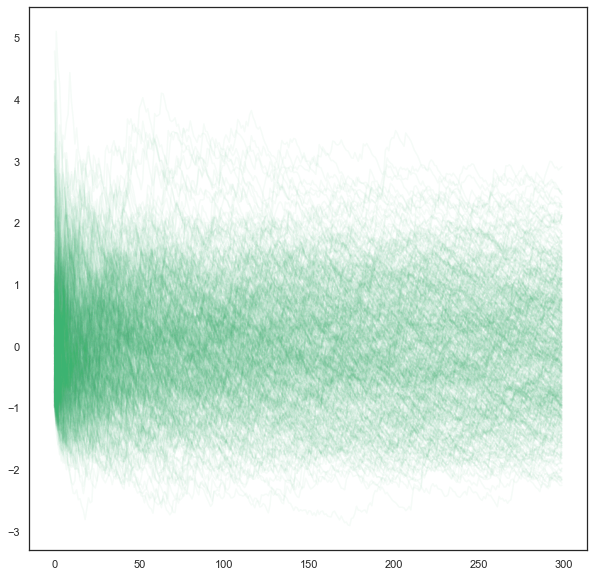

In [20]:
plt.figure(figsize = (10, 10))

for i in range (samples_count):
    plt.plot(np.arange(0, size, 1), zjn[i], color='mediumseagreen', alpha=0.05)

plt.show()


Для $n=300$ по набору случайных величин $Z_{1,300}, ..., Z_{500,300}$ постройте гистограмму. Похожа ли она на плотность распределения $\mathcal{N}(0, 1)$, которую тоже постройте на том же графике? Не забудьте сделать легенду (подписи на графиках, см. семинар и туториалы).

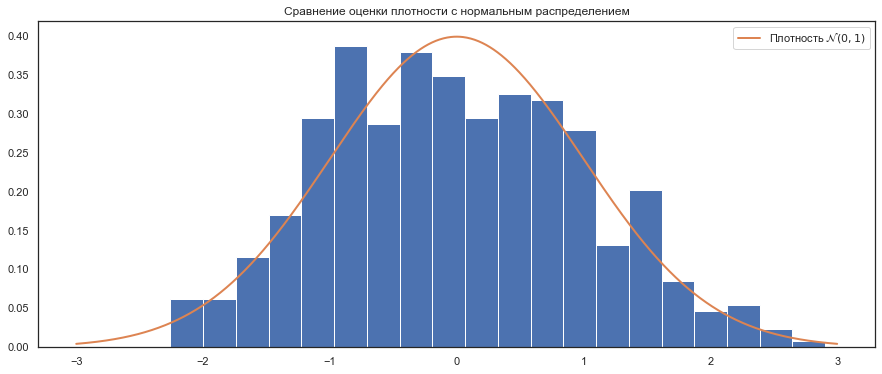

In [22]:
# сетка от -3 до 3 из 1000 значений
grid = np.linspace(-3, 3, 1000)

# считаем значения функции в выборке
norm_pdf_values = sps.norm.pdf(grid)

# отрисовка графика
plt.figure(figsize=(15, 6))
plt.hist(np.array([samp[-1] for samp in zjn]), bins=20, density="True")
plt.plot(grid, norm_pdf_values, label='Плотность $\\mathcal{N}(0,1)$', lw=2)
plt.title('Сравнение оценки плотности с нормальным распределением')
plt.legend()
plt.show()

Сделайте вывод о смысле центральной предельной теоремы.


### Задача 2


Выполните те же действия для распределения $Pois(1)$.


Сделайте вывод о смысле центральной предельной теоремы. Подтверждают ли сделанные эксперименты теоретические свойства?

Выполним те же действия для Пуассоновского распределения.

Сгенерируем 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Pois(1)$. 

In [23]:
size = 300  # размер выборки
samples_count = 500 # количество выборок
 
sample = sps.poisson(1).rvs(size=(samples_count, size))

По каждому из них посчитаем сумму $X_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумму первых $n$ величин $j$-го набора. 

In [25]:
sums = sample.cumsum

Для этого среднего посчитаем величину $Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{jn}}{\sqrt{\mathsf{D}X_{jn}}}$.

In [27]:
zjn = []

for i in range(samples_count):
    sample_1 = sample[i] #одна выборка
    array = [(sample_1[:j].sum() - j)/np.sqrt(j) for j in range(1, size+1)]
    zjn.append(array)
zjn = np.array(zjn)

Построим график $S(n)$

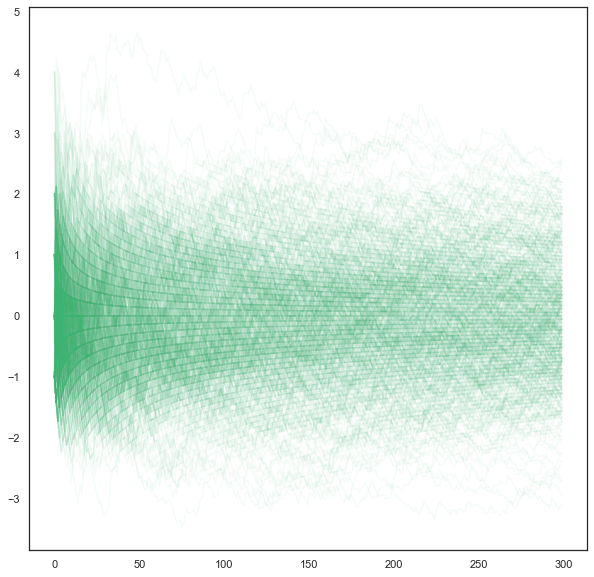

In [29]:
plt.figure(figsize = (10, 10))

for i in range (samples_count):
    plt.plot(np.arange(0, size, 1), zjn[i], color='mediumseagreen', alpha=0.05)

plt.show()

А теперь построим гистограмму с графиком нормального распределения

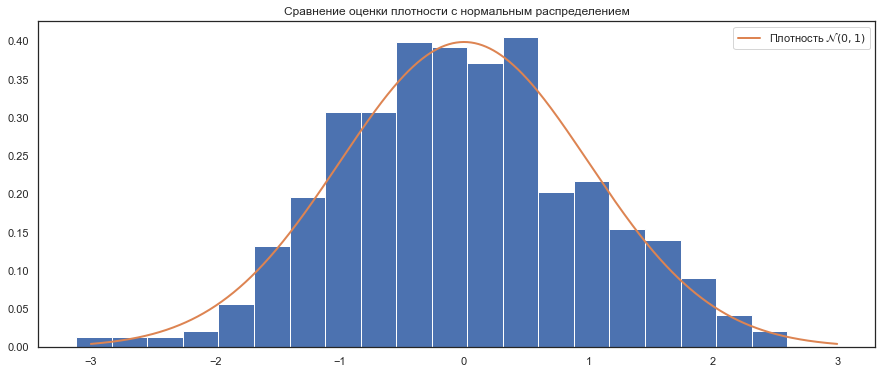

In [31]:
# сетка от -4 до 4 из 1000 значений
grid = np.linspace(-3, 3, 1000)

# считаем значения функции в выборке
norm_pdf_values = sps.norm.pdf(grid)

# отрисовка графика
plt.figure(figsize=(15, 6))
plt.hist(np.array([samp[-1] for samp in zjn]), bins=20, density="True")
plt.plot(grid, norm_pdf_values, label='Плотность $\\mathcal{N}(0,1)$', lw=2)
plt.title('Сравнение оценки плотности с нормальным распределением')
plt.legend()
plt.show()

**Выводы по Заданию 3 и 4**

Проведённые эксперименты подтверждают утверждение центральной предельной теоремы о том, что если есть достаточно большая последовательность одинаково распределённых случайных величин, то их сумма имеет распределение близкое к нормальному ${N}(0,1)$